In [2]:
from fastai.vision.all import *
import pathlib
import os

PROJECT_DIR = './김치'

In [3]:
os.listdir(PROJECT_DIR)

['갓김치',
 '깍두기',
 '나박김치',
 '무생채',
 '배추김치',
 '백김치',
 '부추김치',
 '열무김치',
 '오이소박이',
 '총각김치',
 '파김치']

In [4]:
fnames = get_image_files(PROJECT_DIR)

In [6]:
fnames[4000].parts

('김치', '오이소박이', 'image1.JPG')

In [7]:
def label_func(fname):
    return str(fname.parts[-2])

dblock = DataBlock(get_items = get_image_files, get_y = label_func)

c:\Users\Embedded\Desktop\kimchi_classification\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44621 (\N{HANGUL SYLLABLE GGAG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Embedded\Desktop\kimchi_classification\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Embedded\Desktop\kimchi_classification\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Embedded\Desktop\kimchi_classification\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Embedded\Desktop\kimchi_classification\venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44608 (\N{HANGUL SYLLABLE GIM}) missing from font(s) De

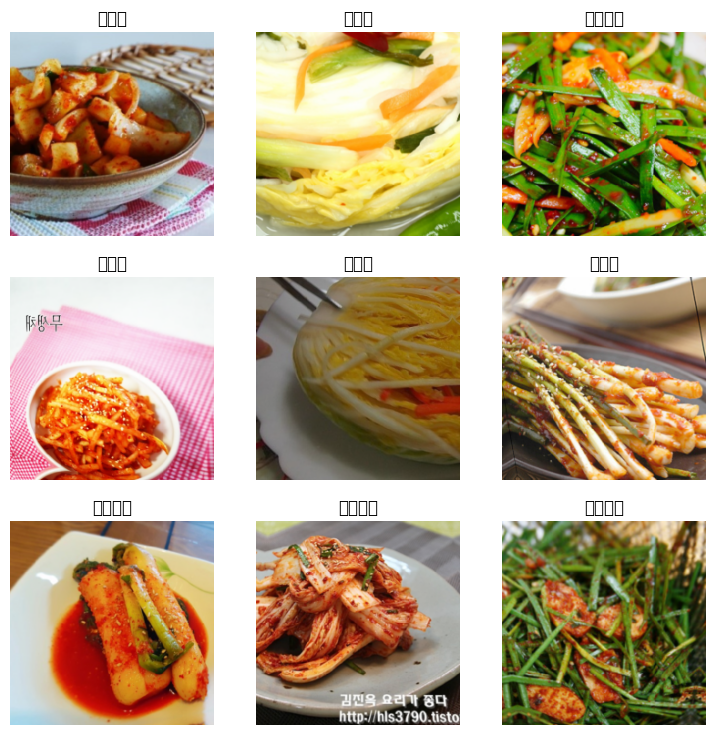

In [8]:
datablock = DataBlock(blocks=(ImageBlock, CategoryBlock), # 이미지, 분류 명시
                      get_items =get_image_files, # 데이터셋 아이템 가져오는 방법
                      get_y = label_func, # label func으로 가져옴
                      splitter=RandomSplitter(valid_pct=0.2, seed=42), # 훈련 vs 검증 세트로 나누는 방식 정의
                      item_tfms=Resize(460), # 아이템에 개별적으로 적용되는 변환 정의
                      batch_tfms=[*aug_transforms(size=224, min_scale=0.75), # 배치 단위로 적용되는 데이터 변환 정의
                                  Normalize.from_stats(*imagenet_stats)]) # 데이터 정규화

# item_tfms=Resize(460) -> 초기에는 큰 사이즈로 리사이즈
# batch_tfms -> 학습 효율성을 위해 후속 배치에서는 이미지 크기를 줄이고 데이터 증강을 이용함
# 이미지 크기를 줄이고 + 정규화를 통해 데이터를 증강시킴

dls = datablock.dataloaders(PROJECT_DIR)
dls.show_batch(max_n=9)

In [9]:
dls.vocab

['갓김치', '깍두기', '나박김치', '무생채', '배추김치', '백김치', '부추김치', '열무김치', '오이소박이', '총각김치', '파김치']

In [10]:
learn = vision_learner(dls, resnet18, metrics=[accuracy, error_rate, Recall(average='macro'), Precision(average='macro')])

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Embedded/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:04<00:00, 10.7MB/s]


c:\Users\Embedded\Desktop\kimchi_classification\venv\lib\site-packages\fastai\learner.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_locat

SuggestedLRs(valley=0.0008317637839354575)

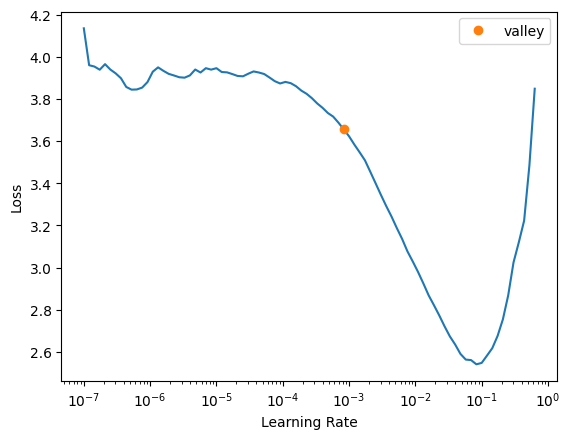

In [11]:
learn.lr_find() # 좋은 학습률을 추천해줌

In [12]:
learn.fine_tune(freeze_epochs=1, epochs=3, base_lr=1e-4)

epoch,train_loss,valid_loss,accuracy,error_rate,recall_score,precision_score,time
0,3.419736,2.058687,0.299091,0.700909,0.302855,0.289964,06:21


epoch,train_loss,valid_loss,accuracy,error_rate,recall_score,precision_score,time
0,2.579951,1.611359,0.455455,0.544545,0.460709,0.439555,07:53
1,2.141447,1.276404,0.584545,0.415455,0.588949,0.575739,06:58
2,1.896692,1.225893,0.600000,0.400000,0.604237,0.587716,06:54


In [ ]:
learn.fit_one_cycle(1, lr_max=1e-4)

In [16]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 시스템에 있는 한글 폰트 확인
for font in fm.findSystemFonts():
    if "Nanum" in font or "Malgun" in font or "D2Coding" in font:
        print(font)

# 폰트 설정 (Windows: Malgun Gothic, Mac: AppleGothic, Linux: 나눔고딕)
plt.rc('font', family='Malgun Gothic')  # Windows

c:\Users\Embedded\Desktop\kimchi_classification\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


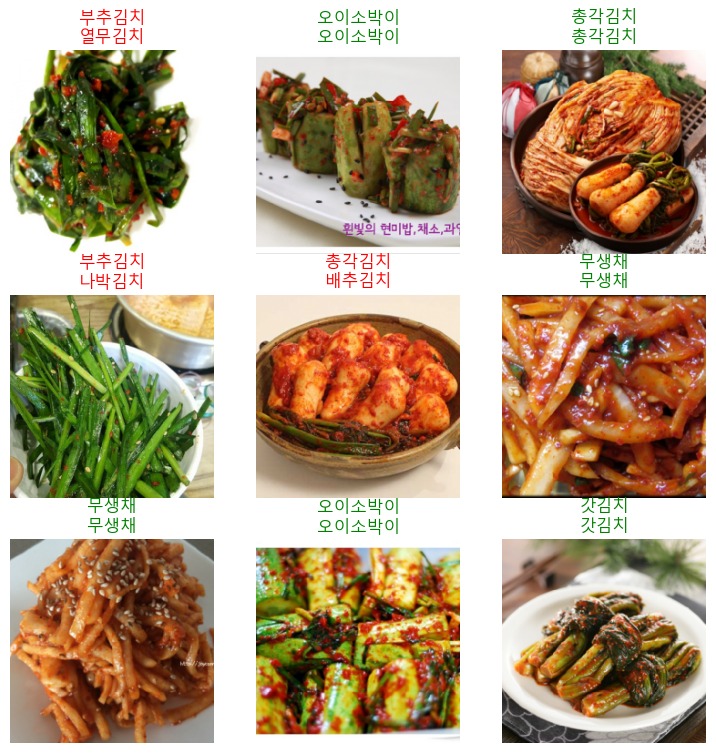

In [17]:
learn.show_results(max_n=9)

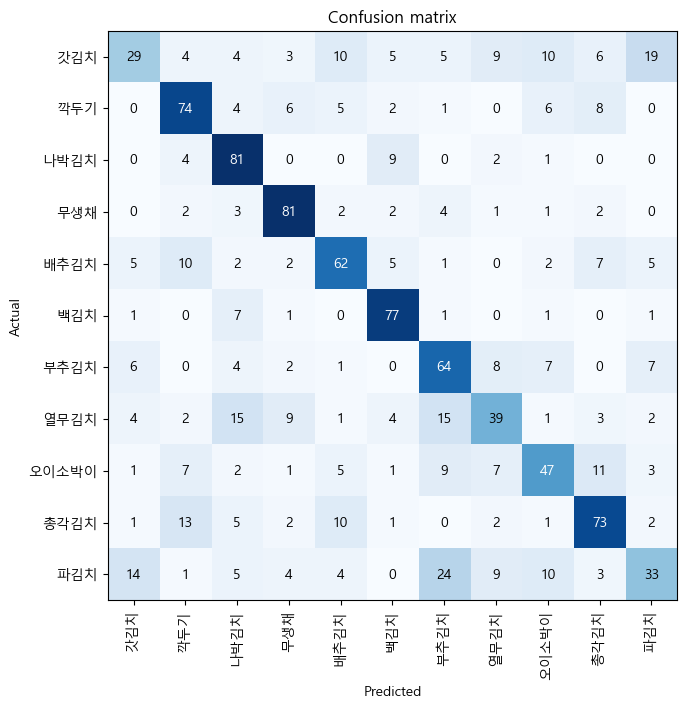

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(7,7))

In [19]:
interp.most_confused()

[('파김치', '부추김치', np.int64(24)),
 ('갓김치', '파김치', np.int64(19)),
 ('열무김치', '나박김치', np.int64(15)),
 ('열무김치', '부추김치', np.int64(15)),
 ('파김치', '갓김치', np.int64(14)),
 ('총각김치', '깍두기', np.int64(13)),
 ('오이소박이', '총각김치', np.int64(11)),
 ('갓김치', '배추김치', np.int64(10)),
 ('갓김치', '오이소박이', np.int64(10)),
 ('배추김치', '깍두기', np.int64(10)),
 ('총각김치', '배추김치', np.int64(10)),
 ('파김치', '오이소박이', np.int64(10)),
 ('갓김치', '열무김치', np.int64(9)),
 ('나박김치', '백김치', np.int64(9)),
 ('열무김치', '무생채', np.int64(9)),
 ('오이소박이', '부추김치', np.int64(9)),
 ('파김치', '열무김치', np.int64(9)),
 ('깍두기', '총각김치', np.int64(8)),
 ('부추김치', '열무김치', np.int64(8)),
 ('배추김치', '총각김치', np.int64(7)),
 ('백김치', '나박김치', np.int64(7)),
 ('부추김치', '오이소박이', np.int64(7)),
 ('부추김치', '파김치', np.int64(7)),
 ('오이소박이', '깍두기', np.int64(7)),
 ('오이소박이', '열무김치', np.int64(7)),
 ('갓김치', '총각김치', np.int64(6)),
 ('깍두기', '무생채', np.int64(6)),
 ('깍두기', '오이소박이', np.int64(6)),
 ('부추김치', '갓김치', np.int64(6)),
 ('갓김치', '백김치', np.int64(5)),
 ('갓김치', '부추김치', np.int64(5)),
 ('깍두기', '배추김치

c:\Users\Embedded\Desktop\kimchi_classification\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Embedded\Desktop\kimchi_classification\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


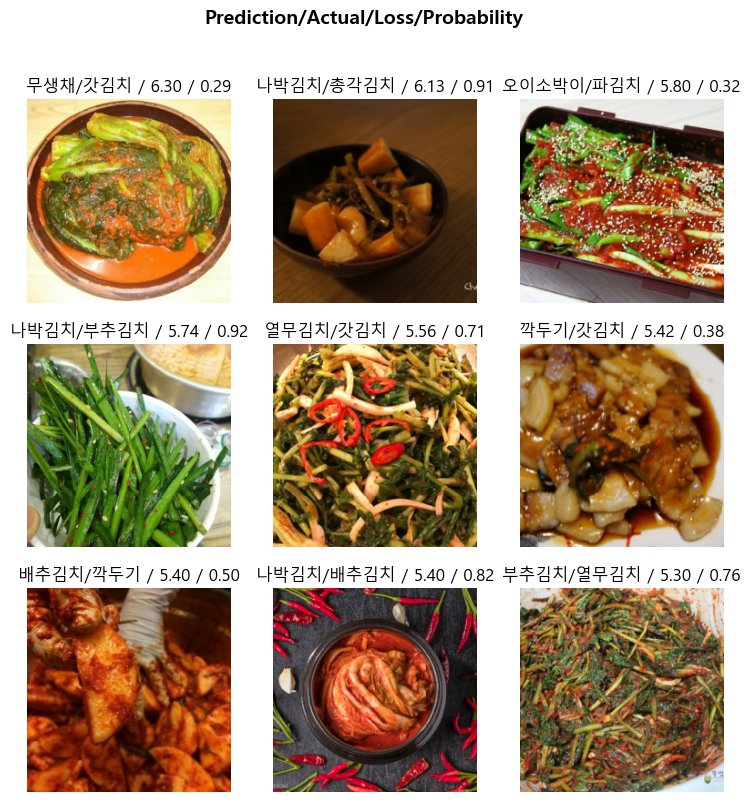

In [20]:
interp.plot_top_losses(k=9)

In [21]:
learn.export('kimchi_classification_model.pkl')
# learn = load_learner('kimchi_classification_model.pkl')